In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
path = '/content/drive/My Drive/S&P_dataset.csv'
df = pd.read_csv(path)
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.400000,12.46,5.32,109.05,6.39,9.82,0.0
1,1871-02-01,4.50,0.26,0.400000,12.84,5.32,107.25,6.20,9.53,0.0
2,1871-03-01,4.61,0.26,0.400000,13.03,5.33,NaN,6.11,9.39,0.0
3,1871-04-01,4.74,0.26,125.424083,12.56,5.33,115.54,6.34,9.75,0.0
4,1871-05-01,4.86,0.26,0.400000,12.27,5.33,121.22,6.48,9.98,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2016 non-null   object 
 1   SP500                 2016 non-null   float64
 2   Dividend              1650 non-null   float64
 3   Earnings              2016 non-null   float64
 4   Consumer Price Index  2016 non-null   float64
 5   Long Interest Rate    2016 non-null   float64
 6   Real Price            1811 non-null   float64
 7   Real Dividend         2016 non-null   float64
 8   Real Earnings         2016 non-null   float64
 9   PE10                  2016 non-null   float64
dtypes: float64(9), object(1)
memory usage: 157.6+ KB


In [10]:
duplicate_rows = df[df.duplicated()]

date_col = 'Date'
duplicate_dates = df[df.duplicated(subset=[date_col])]

duplicate_rows.head()
duplicate_dates.head()




,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
9,1871-01-01,4.59,0.26,0.400000,12.37,5.35,113.60,6.43,9.90,0.0
21,1872-01-01,4.97,0.29,0.425000,12.75,5.52,119.33,7.04,10.20,0.0
33,1873-01-01,4.19,0.32,158.154244,12.27,5.50,NaN,8.11,11.35,0.0
45,1874-01-01,4.53,0.33,0.460000,11.61,5.17,119.47,8.70,12.13,0.0
57,1875-01-01,4.30,0.30,0.376700,11.13,4.71,118.25,8.39,10.36,0.0


In [11]:
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.drop_duplicates(subset =[date_col])

df_cleaned.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.400000,12.46,5.32,109.05,6.39,9.82,0.0
1,1871-02-01,4.50,0.26,0.400000,12.84,5.32,107.25,6.20,9.53,0.0
2,1871-03-01,4.61,0.26,0.400000,13.03,5.33,NaN,6.11,9.39,0.0
3,1871-04-01,4.74,0.26,125.424083,12.56,5.33,115.54,6.34,9.75,0.0
4,1871-05-01,4.86,0.26,0.400000,12.27,5.33,121.22,6.48,9.98,0.0


We identified both full-row duplicates and repeated dates in the dataset. Since duplicates do not add new information and may bias statistical analysis or modeling, we removed them using Pandas’ drop_duplicates() method. This ensures that each record in the dataset corresponds to a unique date with consistent market indicators.

In [12]:
missing_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(missing_percentage_cleaned)


Date                     0.000000
SP500                    0.000000
Dividend                10.113028
Earnings                 0.000000
Consumer Price Index     0.000000
Long Interest Rate       0.000000
Real Price               9.637121
Real Dividend            0.000000
Real Earnings            0.000000
PE10                     0.000000
dtype: float64


To address missing values in the dataset, we first calculated the percentage of missing values in each column using the formula (df.isnull().sum() / len(df)) * 100.

This analysis showed that the Dividend and Real Price columns had approximately 9.98% missing entries, while all other columns were complete.


In [13]:
df_cleaned['Dividend'] = df_cleaned['Dividend'].ffill().bfill()
df_cleaned['Real Price'] = df_cleaned['Real Price'].ffill().bfill()


To handle these missing values, we applied a combination of forward fill (ffill) and backward fill (bfill) methods. Forward fill replaces a missing value with the most recent valid entry above it, while backward fill ensures that any gaps at the beginning of the series are filled using the next available value below.

This approach is especially suitable for time series financial data because it preserves the continuity and temporal sequence of the values without introducing artificial averages

In [14]:
missing_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(missing_percentage_cleaned)

Date                    0.0
SP500                   0.0
Dividend                0.0
Earnings                0.0
Consumer Price Index    0.0
Long Interest Rate      0.0
Real Price              0.0
Real Dividend           0.0
Real Earnings           0.0
PE10                    0.0
dtype: float64


After applying forward and backward fill, we recalculated the missing value percentages and confirmed that all missing entries had been successfully filled, leaving the dataset with 0% missing values across all columns.

In [15]:
df_cleaned.info()
df_cleaned2 = df_cleaned.copy()
df_cleaned2 = df_cleaned2.drop('Date', axis =1)
df_cleaned2.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1832
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1681 non-null   object 
 1   SP500                 1681 non-null   float64
 2   Dividend              1681 non-null   float64
 3   Earnings              1681 non-null   float64
 4   Consumer Price Index  1681 non-null   float64
 5   Long Interest Rate    1681 non-null   float64
 6   Real Price            1681 non-null   float64
 7   Real Dividend         1681 non-null   float64
 8   Real Earnings         1681 non-null   float64
 9   PE10                  1681 non-null   float64
dtypes: float64(9), object(1)
memory usage: 209.0+ KB


,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,378.553470,7.467406,19.173056,65.378079,4.487585,745.274212,20.047076,41.117490,19.485610
std,811.993459,13.636255,55.165167,80.218900,2.296889,918.044766,21.599799,37.695799,8.826255
min,2.730000,0.000000,-154.909855,6.280000,0.620000,82.870000,-46.897062,0.000000,0.000000
25%,7.950000,0.420000,0.510000,10.280000,3.150000,210.220000,10.130000,15.810000,14.500000
50%,18.090000,0.920000,1.760000,21.900000,3.800000,324.810000,16.210000,26.910000,19.790000
75%,188.300000,7.690000,19.340000,107.800000,5.100000,813.130000,26.470000,49.670000,24.370000
max,4674.772727,68.710000,197.910000,306.130000,15.320000,5140.590000,87.846801,217.260000,48.110000


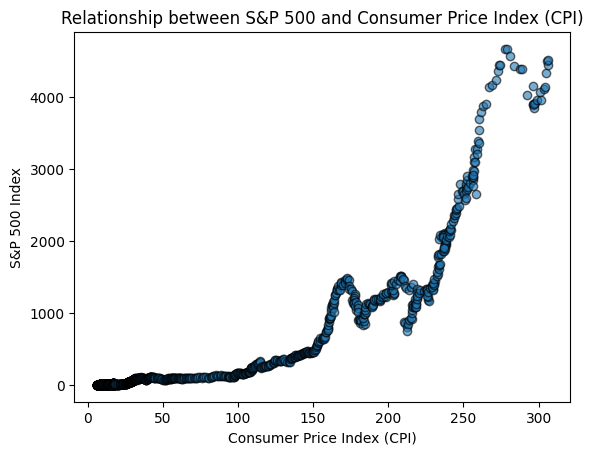

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df_cleaned['Consumer Price Index'], df_cleaned['SP500'], alpha=0.6, edgecolor='k')
plt.title("Relationship between S&P 500 and Consumer Price Index (CPI)")
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("S&P 500 Index")
plt.show()

To explore the relationship between the S&P 500 index and the Consumer Price Index (CPI), we created a scatter plot where the S&P 500 values are plotted on the y-axis and the CPI values on the x-axis. Each point on the plot represents a historical data entry from the dataset.

A scatter plot is particularly suitable for this task because it allows us to visualize the relationship between two continuous numerical variables. Unlike line charts or bar plots, scatter plots clearly display the spread and density of data points, making it easier to detect both linear and non-linear correlations.

From the visualization, we observe that at lower CPI levels—representing earlier historical periods—the S&P 500 also had low values, consistent with the smaller scale of the market at that time. As CPI increases over time, the S&P 500 generally trends higher, indicating long-term market growth.

However, the points also display wide variation within similar CPI ranges, showing that while inflation (measured by CPI) has a long-term association with equity market performance, other factors such as economic cycles, interest rates, and policy changes significantly influence market behavior.


In [17]:
df_cleaned = df_cleaned.sort_values("Date")
df_cleaned['CPI_YoY_Change'] = df_cleaned['Consumer Price Index'].pct_change(periods=12) * 100
top5_cpi_changes = df_cleaned.nlargest(5, 'CPI_YoY_Change')[['Date', 'Consumer Price Index', 'CPI_YoY_Change']]

In [18]:
top5_cpi_changes

,Date,Consumer Price Index,CPI_YoY_Change
591,1920-04-01,20.3,23.780488
593,1920-06-01,20.9,23.668639
592,1920-05-01,20.6,23.353293
594,1920-07-01,20.8,23.076923
574,1918-11-01,16.3,22.556391


In [19]:
df_cleaned['Earnings_MA_12'] = df_cleaned['Earnings'].rolling(window=12).mean()
df_cleaned['Earnings_MA_12']

,Earnings_MA_12
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1828,127.174498
1829,126.093387
1830,115.621720
1831,113.554837


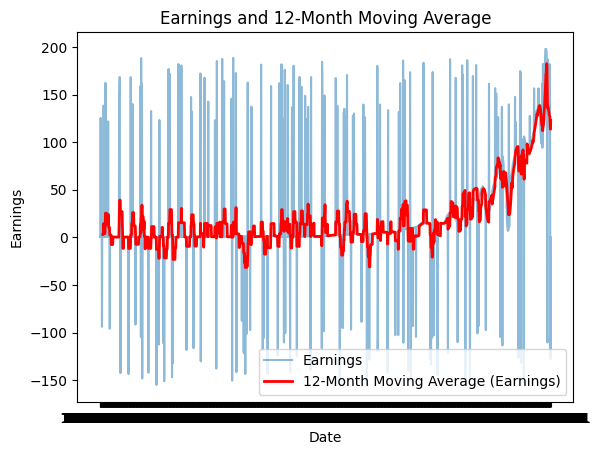

In [20]:
plt.plot(df_cleaned['Date'], df_cleaned['Earnings'], label="Earnings", alpha=0.5)
plt.plot(df_cleaned['Date'], df_cleaned['Earnings_MA_12'], label="12-Month Moving Average (Earnings)", color="red", linewidth=2)
plt.title("Earnings and 12-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Earnings")
plt.legend()
plt.show()


To smooth short-term fluctuations in the Earnings data and highlight long-term trends, we calculated a 12-month moving average (MA). This was done using Pandas’ rolling(window=12).mean() function, which computes the average of the current month’s value and the previous 11 months. A new column, Earnings_MA_12, was created to store these values.

When applying a 12-month moving window, the first 11 months of the dataset naturally lack enough past data to compute a full average. In our strategy, these entries remain as NaN, which is standard practice in time series analysis. This avoids introducing artificial values that could distort the early part of the trend.

The plot shows both the raw Earnings data and the smoothed 12-month moving average. The moving average line (in red) filters out short-term volatility, making it easier to observe overall growth patterns and cyclical behavior in the Earnings series. This is particularly useful for financial and economic time series where month-to-month values may fluctuate due to temporary shocks.


In [21]:
sp500_min = df_cleaned['SP500'].min()
sp500_max = df_cleaned['SP500'].max()
df_cleaned['SP500_Normalized'] = (df_cleaned['SP500'] - sp500_min) / (sp500_max - sp500_min)

top10_sp500 = df_cleaned.nlargest(10, 'SP500')[['Date', 'SP500', 'SP500_Normalized']]
print(top10_sp500)

            Date        SP500  SP500_Normalized
1811  2021-12-01  4674.772727          1.000000
1810  2021-11-01  4667.386667          0.998419
1812  2022-01-01  4573.815500          0.978391
1832  2023-09-01  4515.770000          0.965967
1830  2023-07-01  4508.075500          0.964320
1831  2023-08-01  4457.358696          0.953465
1807  2021-08-01  4454.206364          0.952790
1808  2021-09-01  4445.543333          0.950936
1813  2022-02-01  4435.980526          0.948889
1815  2022-04-01  4391.296000          0.939325


Normalization is used in machine learning to bring different numeric features onto a common scale, usually between 0 and 1 or standardized around mean 0 and variance 1. This is important because features measured in very different units (e.g., millimeters, grams, or dollars) can otherwise dominate the learning process, making optimization unstable or biased

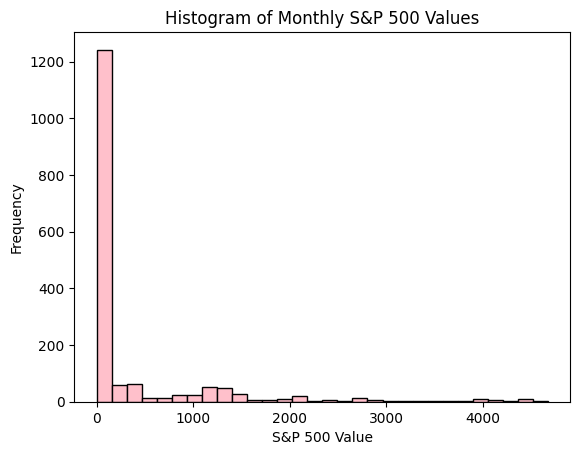

In [22]:
plt.hist(df_cleaned['SP500'], bins=30, color='pink', edgecolor='black')
plt.title("Histogram of Monthly S&P 500 Values")
plt.xlabel("S&P 500 Value")
plt.ylabel("Frequency")
plt.show()

We created a histogram of the monthly S&P 500 index values to examine the distribution of prices over time. The x-axis represents ranges of S&P 500 values, while the y-axis shows how often values fell within each range.

A histogram is well suited for this analysis because it summarizes the distribution of a continuous variable and helps identify where most values are concentrated.

The plot shows that the majority of monthly S&P 500 values are clustered in the lower ranges, which reflects the dataset’s long history beginning in the 1800s when stock prices were much lower.

In contrast, there are fewer observations in the higher ranges, corresponding to recent decades of market growth, which creates a right-skewed distribution.
This visualization highlights how the S&P 500 has increased dramatically over time, with earlier values dominating the lower range and more recent values marking the historical peaks.


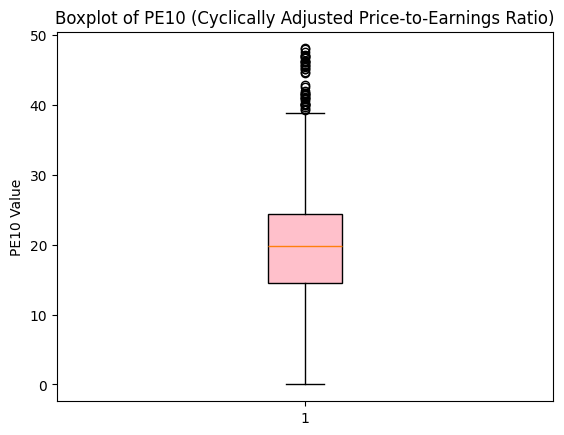

In [23]:
plt.boxplot(df_cleaned['PE10'], vert=True, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.title("Boxplot of PE10 (Cyclically Adjusted Price-to-Earnings Ratio)")
plt.ylabel("PE10 Value")
plt.show()

We created a boxplot of the PE10 (Cyclically Adjusted Price-to-Earnings Ratio) to examine its distribution and identify the presence of outliers. A boxplot is well suited for this purpose because it summarizes the central tendency, spread, and variability of the data in a compact form.

The plot displays the median PE10 value, the interquartile range (IQR), and any extreme values that fall outside the whiskers. From the visualization, we can see that most PE10 values lie within a moderate range, while there are several points extending above the upper whisker, indicating periods when market valuations were unusually high compared to historical norms.

This suggests that although the long-term average PE10 is relatively stable, certain market cycles have driven the ratio far above typical levels, which is useful for identifying bubbles or overheated markets in financial analysis.


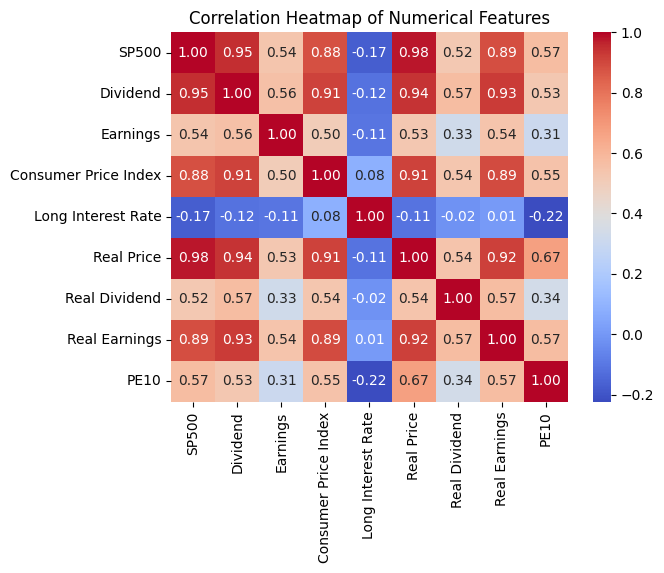

In [24]:
import seaborn as sns
num_cols = ['SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
            'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings', 'PE10']
corr_matrix = df_cleaned[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

We generated a correlation heatmap of all the numerical features in the dataset, excluding newly added columns such as moving averages or normalized values. A heatmap is an effective visualization for this task because it presents pairwise correlation coefficients in a compact, color-coded grid, making it easy to identify strong positive or negative relationships.

 From the heatmap, we can observe that the S&P 500 index has a strong positive correlation with the Dividend, Consumer Price Index (CPI) and Real Price, reflecting the long-term upward trend of both inflation and market values. Similarly, dividends and Real Earnings are highly correlated, as expected, while PE10 shows moderate relationships with both earnings and prices.

The heatmap also reveals weaker or near-zero correlations among certain variables, highlighting features that behave independently. This visualization is valuable for feature selection and understanding which economic indicators move together and which contribute unique information in financial analysis.


In [25]:
from sklearn.preprocessing import StandardScaler
num_features = ['SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
                'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings', 'PE10']
df_num = df_cleaned[num_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

df_scaled = pd.DataFrame(df_scaled, columns=num_features, index=df_cleaned.index)
df_scaled


,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,-0.460872,-0.528705,-0.340408,-0.659867,0.362518,-0.693227,-0.632466,-0.830512,-2.208344
1,-0.460798,-0.528705,-0.340408,-0.655129,0.362518,-0.695188,-0.641265,-0.838207,-2.208344
2,-0.460662,-0.528705,-0.340408,-0.652760,0.366873,-0.695188,-0.645433,-0.841922,-2.208344
3,-0.460502,-0.528705,1.926626,-0.658620,0.366873,-0.686156,-0.634782,-0.832369,-2.208344
4,-0.460354,-0.528705,-0.340408,-0.662236,0.366873,-0.679967,-0.628298,-0.826266,-2.208344
...,...,...,...,...,...,...,...,...,...
1828,4.641344,4.480025,2.951099,2.977141,-0.399609,3.735325,2.266571,3.694681,1.320816
1829,4.886739,4.492496,2.937454,2.989361,-0.321219,3.938459,2.264256,3.732362,1.464748
1830,5.087173,-0.547777,-0.347661,2.996593,-0.255894,4.106943,-2.902031,-1.091096,1.574680
1831,5.024694,-0.547777,-2.666021,3.000210,-0.138309,4.046982,-0.928390,-1.091096,1.521414


StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to clustering, preventing large-scale variables like the S&P 500 index from dominating smaller-scale variables such as interest rates or dividends.

•	The selected numerical features (SP500, Dividend, Earnings, CPI, Long Interest Rate, Real Price, Real Dividend, Real Earnings, PE10) have been standardized.

•	Each feature is now on the same scale, ready for KMeans clustering.


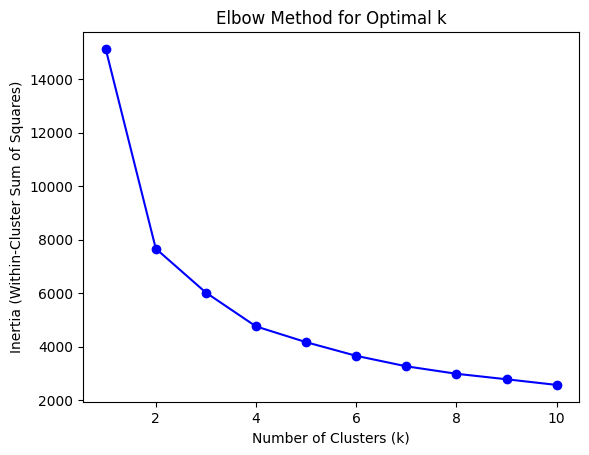

In [26]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

The Elbow Method involves plotting the inertia (within-cluster sum of squares) against the number of clusters k. As kincreases, inertia decreases because clusters become smaller and tighter. However, after a certain point, the rate of improvement drops significantly, creating an “elbow” in the curve. This elbow point indicates the optimal balance between having compact clusters and avoiding overfitting with too many clusters.
From the plotted elbow curve, the bend appears around k = 3 or 4, suggesting that the dataset naturally groups into 3–4 distinct clusters based on the selected financial and economic indicators.


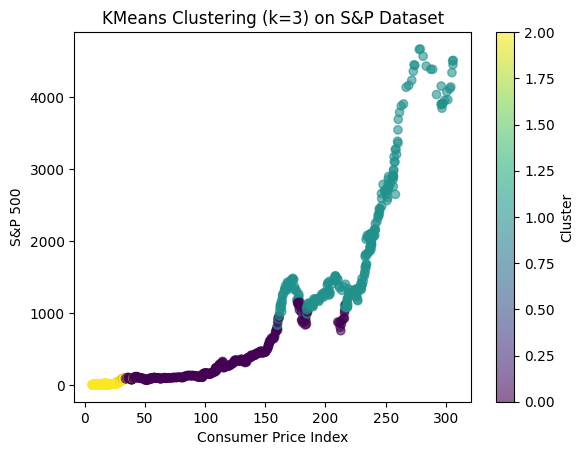

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

plt.scatter(df_cleaned['Consumer Price Index'], df_cleaned['SP500'],
            c=df_cleaned['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Consumer Price Index")
plt.ylabel("S&P 500")
plt.title("KMeans Clustering (k=3) on S&P Dataset")
plt.colorbar(label="Cluster")
plt.show()

After selecting and standardizing the numerical features, we applied KMeans clustering with k=3, which was determined as optimal using the Elbow Method. Each row in the dataset was assigned to one of the three clusters based on the similarity of its financial and economic indicators.

To visualize the clustering results, we created a scatter plot of the S&P 500 index against the Consumer Price Index (CPI), with points colored by their assigned cluster. This choice of variables for visualization is appropriate because both S&P 500 and CPI are strong indicators of market performance and inflation, allowing us to interpret the clusters meaningfully.

The resulting plot shows that the algorithm successfully grouped data points into distinct clusters. One cluster corresponds to earlier historical periods with low CPI and low S&P 500 values, another represents more recent periods with high CPI and high market valuations, and the third captures intermediate values, likely reflecting transitional economic periods. This clustering highlights how market behavior and inflation have jointly evolved over time and provides insights into the natural groupings of economic conditions.


K-Means clustering:

We applied KMeans clustering on the dataset after preprocessing steps that included removing duplicates, filling missing values using forward and backward fill for Dividend and Real Price, and standardizing all numerical features using StandardScaler. Standardization was necessary to ensure that variables with larger magnitudes, such as S&P 500, did not dominate the clustering process.

The Elbow Method was used to determine the optimal number of clusters by plotting the within-cluster sum of squares (inertia) against different values of 𝑘.

The curve indicated an elbow at around 3 clusters, suggesting this was the most balanced choice between compactness and interpretability. We therefore ran KMeans with k = 3, and each data point in the dataset was assigned a cluster label.

Clustering Results:

The clustering results revealed three distinct groups in the data:

Cluster 1 – Early Market Periods (Low CPI, Low S&P 500)

•	This cluster includes older historical data points where both CPI and S&P 500 values were very low.

•	It reflects the early stages of the U.S. economy and stock market, when prices and inflation were much smaller in scale compared to modern times.

Cluster 2 – Transitional Periods (Moderate CPI and Market Levels)

•	This cluster captures middle-range values of CPI and S&P 500, representing transitional phases in the economy.

•	These periods likely correspond to growth phases and post-recession recoveries, where markets were developing but had not yet reached recent record highs.

Cluster 3 – Modern Market Era (High CPI, High S&P 500)

•	This cluster contains recent decades, where both CPI and S&P 500 reached historically high levels.

•	It represents today’s highly developed market environment, characterized by globalization, advanced monetary policy, and large-scale corporate growth.

The visualization confirmed that the clusters form natural groupings over time, with CPI and S&P 500 serving as strong axes of separation. Importantly, the clusters reflect different economic eras rather than arbitrary divisions, highlighting the effectiveness of clustering in uncovering historical patterns in financial data.


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


numdf = df_cleaned.drop(columns=['Date', 'CPI_YoY_Change', 'SP500_Normalized', 'Earnings_MA_12','Cluster'])
X = numdf.drop(columns=['SP500'])
y = numdf['SP500']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
y_predmse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(y_predmse)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Results:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Linear Regression Results:
RMSE: 107.13615462074507
R² Score: 0.9819411765084626


Linear Regression is a simple yet powerful statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a straight line through the data. It is widely used because of its interpretability and effectiveness as a baseline model.

The given code applies a Linear Regression model to predict the S&P 500 index using key economic indicators as features. After removing non-essential and derived columns, the dataset was split into training (80%) and testing (20%) sets for fair evaluation.

The model was trained on historical data and tested on unseen data, with performance evaluated using RMSE and R² metrics. The results show an RMSE of about 107 points, meaning the average prediction error is very small compared to the overall scale of the S&P 500 index.

 The R² score of 0.98 indicates that the model explains nearly all of the variance in the data, reflecting an excellent fit. This confirms that Linear Regression, despite its simplicity, is highly effective at capturing the relationship between economic indicators such as dividends, earnings, CPI, and interest rates with the S&P 500, making it a strong baseline for comparison with more advanced models.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df_cleaned['CPI_Next'] = df_cleaned['Consumer Price Index'].shift(-1)
df_cleaned['CPI_Up'] = (df_cleaned['CPI_Next'] > df_cleaned['Consumer Price Index']).astype(int)

df_cleaned = df_cleaned.dropna()
X = df_cleaned.drop(columns=['Date','CPI_Next','CPI_Up'])
y = df_cleaned['CPI_Up']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Classification Accuracy: 0.718562874251497

Confusion Matrix:
 [[122  27]
 [ 67 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.72       149
           1       0.81      0.64      0.72       185

    accuracy                           0.72       334
   macro avg       0.73      0.73      0.72       334
weighted avg       0.74      0.72      0.72       334



The Logistic Regression model was trained to classify whether the Consumer Price Index (CPI) would increase or decrease in the next month using key economic indicators as input features.

To set up the problem, a binary target variable CPI_Up was created, which takes the value 1 if the CPI increases compared to the previous month and 0 otherwise.

The dataset was split into training (80%) and testing (20%) sets using stratified sampling to preserve class balance, and features were standardized with StandardScaler to ensure comparability across variables. The model achieved an accuracy of about 72%, meaning it correctly predicted CPI trends in nearly three out of four cases, which is much better than random guessing.

The confusion matrix showed that out of 149 months where CPI went down, the model correctly predicted 122 and misclassified 27, while out of 185 months where CPI went up, it correctly predicted 118 but misclassified 67.

The classification report indicated that for CPI decreases, the model had a precision of 0.65, recall of 0.82, and an F1-score of 0.72, showing that it is particularly good at identifying months when CPI falls.

For CPI increases, precision was higher at 0.81, recall was lower at 0.64, and F1-score was also 0.72, suggesting the model is reliable when it predicts an increase but sometimes misses actual upward movements. Overall, with balanced F1-scores across both classes and strong performance relative to a random baseline, the model provides a solid baseline approach for CPI trend prediction.
